# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
#Carregando biblioteca
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
#Carregando dados
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# 1) Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em tip, 
# explicada por sex, smoker, diner e net_bill:

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [4]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [5]:
# 2) Remova as variáveis não significantes:

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.64e-20
Time:                        13:02:43   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# 2) Remova as variáveis não significantes:
y, X = patsy.dmatrices('tip ~ net_bill', tips)
X

DesignMatrix with shape (244, 2)
  Intercept  net_bill
          1     15.98
          1      8.68
          1     17.51
          1     20.37
          1     20.98
          1     20.58
          1      6.77
          1     23.76
          1     13.08
          1     11.55
          1      8.56
          1     30.26
          1     13.85
          1     15.43
          1     11.81
          1     17.66
          1      8.66
          1     12.58
          1     13.47
          1     17.30
          1     13.84
          1     17.54
          1     13.54
          1     31.84
          1     16.64
          1     15.47
          1     11.37
          1     10.69
          1     17.40
          1     16.65
  [214 rows omitted]
  Terms:
    'Intercept' (column 0)
    'net_bill' (column 1)
  (to view full data, use np.asarray(this_obj))

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           5.02e-23
Time:                        13:25:02   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

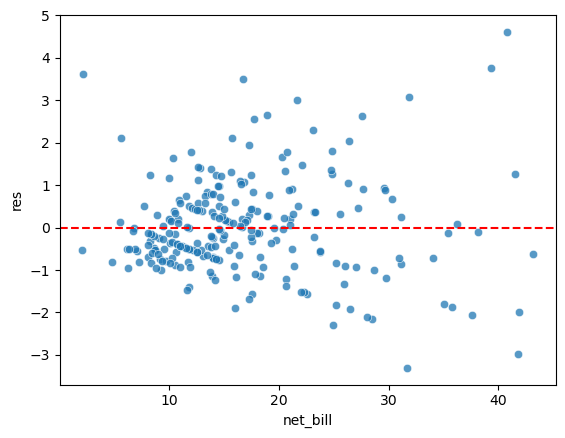

In [7]:
# 3) Observe o gráfico de resíduos em função de net_bill:

reg = smf.ols('tip ~ net_bill', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.40e-20
Time:                        13:25:58   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

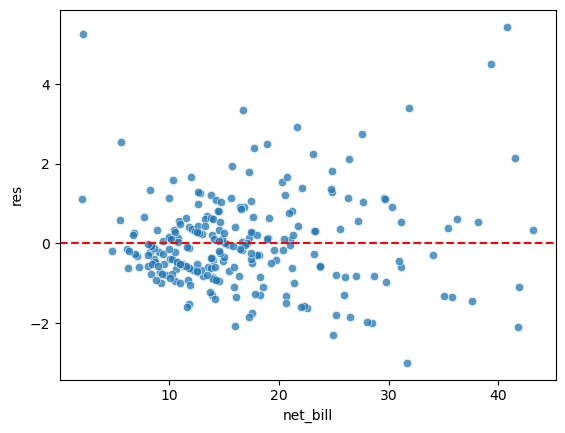

In [10]:
# 4) Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo:

# Log:

reg = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.96e-22
Time:                        13:26:55   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.07

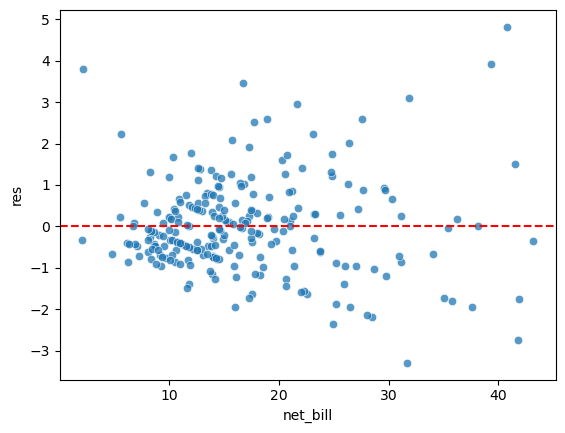

In [11]:
# Polinônio:

reg = smf.ols('tip ~ net_bill + np.power(net_bill, 2)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

O melhor modelo é o ajustado em função do polinônio de net_bill com R² 0.334.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [12]:
# 1) Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no 
#log de tip, explicado por sex, smoker, diner e net_bill.

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [13]:
# 2) Remova as variáveis não significantes:

modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.21e-18
Time:                        13:30:03   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', tips)
X

DesignMatrix with shape (244, 2)
  Intercept  net_bill
          1     15.98
          1      8.68
          1     17.51
          1     20.37
          1     20.98
          1     20.58
          1      6.77
          1     23.76
          1     13.08
          1     11.55
          1      8.56
          1     30.26
          1     13.85
          1     15.43
          1     11.81
          1     17.66
          1      8.66
          1     12.58
          1     13.47
          1     17.30
          1     13.84
          1     17.54
          1     13.54
          1     31.84
          1     16.64
          1     15.47
          1     11.37
          1     10.69
          1     17.40
          1     16.65
  [214 rows omitted]
  Terms:
    'Intercept' (column 0)
    'net_bill' (column 1)
  (to view full data, use np.asarray(this_obj))

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.60e-21
Time:                        13:31:20   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

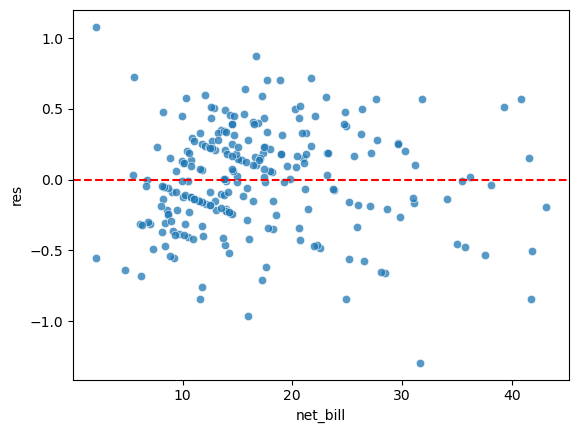

In [15]:
# 3) Observe o gráfico de resíduos em função de net_bill:

reg = smf.ols('np.log(tip) ~ net_bill', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     28.12
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           3.79e-19
Time:                        13:36:48   Log-Likelihood:                -96.213
No. Observations:                 244   AIC:                             202.4
Df Residuals:                     239   BIC:                             219.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sex[Male]           -0.4185      0.145  

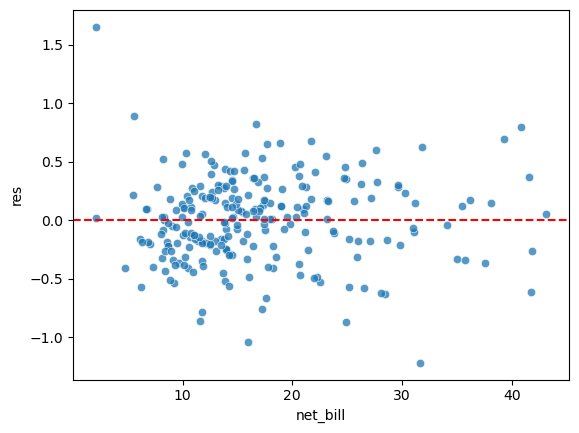

In [16]:
# 4) Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo:

# Log:

reg = smf.ols('np.log(tip) ~ sex + smoker + time + np.log(net_bill) + 0', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     40.92
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           2.15e-21
Time:                        13:37:04   Log-Likelihood:                -92.864
No. Observations:                 244   AIC:                             193.7
Df Residuals:                     240   BIC:                             207.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.17

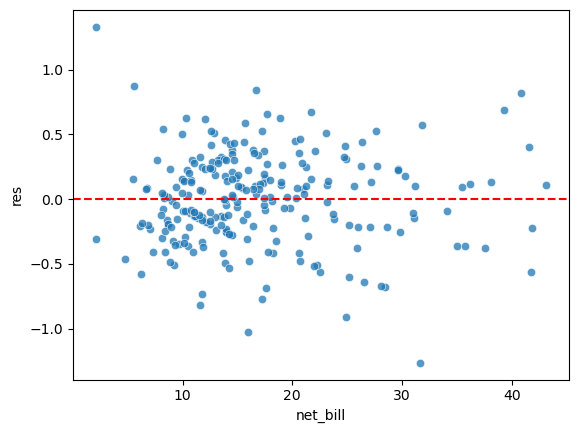

In [17]:
# Polinônio:

reg = smf.ols('np.log(tip) ~ smoker + net_bill + np.power(net_bill, 2)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

O melhor modelo é o ajustado em função do log de tip e polinônio de net_bill com R² 0.338.

In [18]:
# 5) Do modelo final deste item, calcule o 𝑅2 na escala de tip (sem o log). Compare com
# o modelo do item 1. Qual tem melhor coeficiente de determinação?

reg = smf.ols('tip ~ smoker + net_bill + np.power(net_bill, 2)', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     40.55
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           3.11e-21
Time:                        13:44:28   Log-Likelihood:                -374.93
No. Observations:                 244   AIC:                             757.9
Df Residuals:                     240   BIC:                             771.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.01

Comparando com o R² dos modelos do item 1, o melhor coeficiente de determinação (R²):

In [19]:
# Modelos do item 1: 

reg = smf.ols('tip ~ net_bill', data = tips).fit()
print(reg.summary())
print('X'*100)

# Log:
reg = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())
print('X'*100)

# Polinônio:
reg = smf.ols('tip ~ net_bill + np.power(net_bill, 2)', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           5.02e-23
Time:                        13:45:48   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [22]:
#Carregando dados

df1 = pd.read_csv('previsao_de_renda.csv')

df1.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [23]:
# 1) Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, 
# por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. 
# Utilize os recursos que achar necessário.


reg = smf.ols('renda ~ tempo_emprego', data = df1).fit()
df1['res_log'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:49:10   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:50:41   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

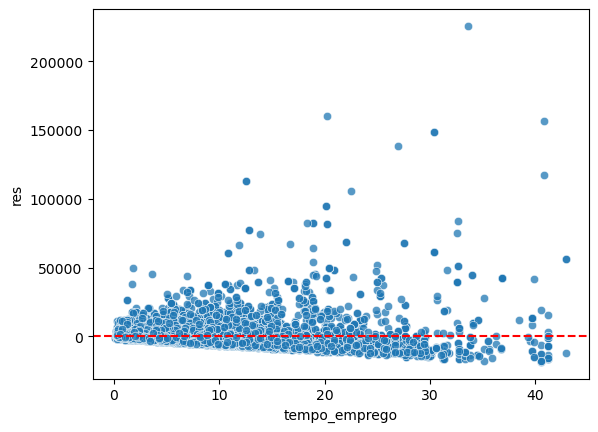

In [25]:
# 2) Faça uma análise de resíduos.

reg = smf.ols('renda ~ tempo_emprego', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

Conforme aumenta o tempo de emprego a variância vai aumentando.Poderíamos tentar melhorar essa regressão transformando a variável resposta em um polinômio de segundo grau ou avaliar outras transformações.

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1250.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.60e-261
Time:                        13:52:18   Log-Likelihood:            -1.3003e+05
No. Observations:               12427   AIC:                         2.601e+05
Df Residuals:                   12425   BIC:                         2.601e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1725.24

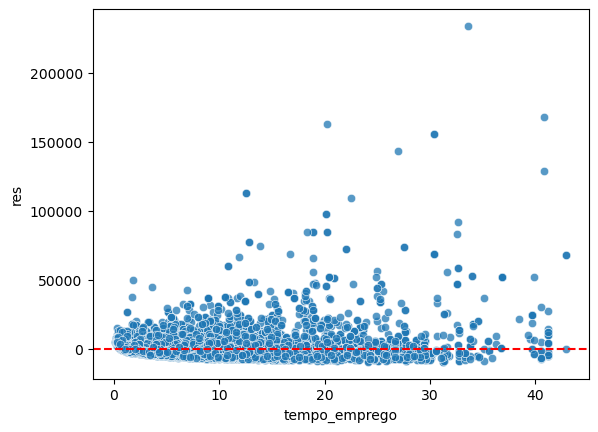

In [26]:
# Com os recursos vistos neste módulo, como você melhoraria esta regressão?

# R. podemos  transformar X e Y para tentar melhoras o modelo:

# log de tempo_emprego:

reg = smf.ols('renda ~ np.log(tempo_emprego)', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:52:32   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851

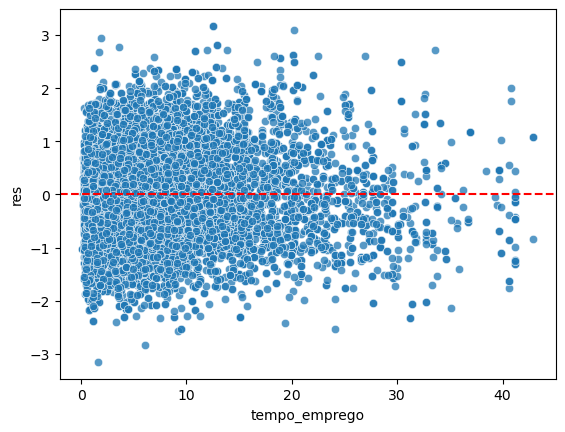

In [27]:
# log de renda:

reg = smf.ols('np.log(renda) ~ tempo_emprego', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1116.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:53:25   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

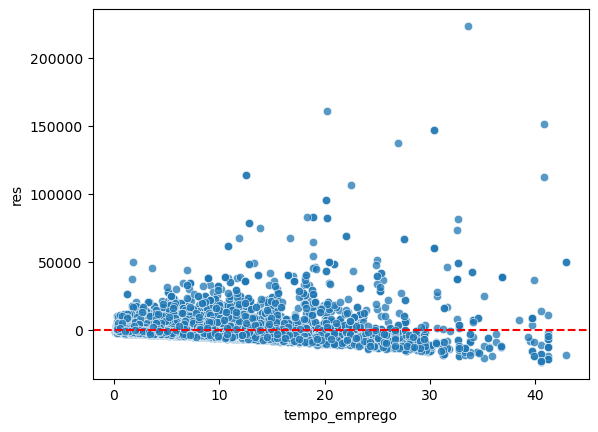

In [28]:
# Polinônio de tempo_emprego :

reg = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego, 2)', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                      -0.451
Model:                            OLS   Adj. R-squared:                 -0.451
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 13 Dec 2023   Prob (F-statistic):                nan
Time:                        13:54:46   Log-Likelihood:            -1.3294e+05
No. Observations:               12427   AIC:                         2.659e+05
Df Residuals:                   12426   BIC:                         2.659e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.682e-

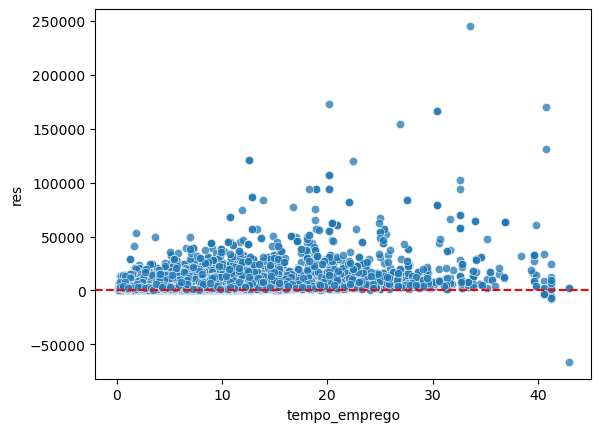

In [29]:
# Função exponencial de tempo_emprego :

reg = smf.ols('renda ~ np.exp(tempo_emprego)', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

In [31]:
# 3) Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) 
# de acordo com as demais variáveis.

y, X = patsy.dmatrices('renda ~ posse_de_veiculo+posse_de_imovel+qtd_filhos+tipo_renda+educacao+estado_civil+tipo_residencia+idade+tempo_emprego+qt_pessoas_residencia', df1)


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     107.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:00:14   Log-Likelihood:            -1.2950e+05
No. Observations:               12427   AIC:                         2.591e+05
Df Residuals:                   12403   BIC:                         2.592e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

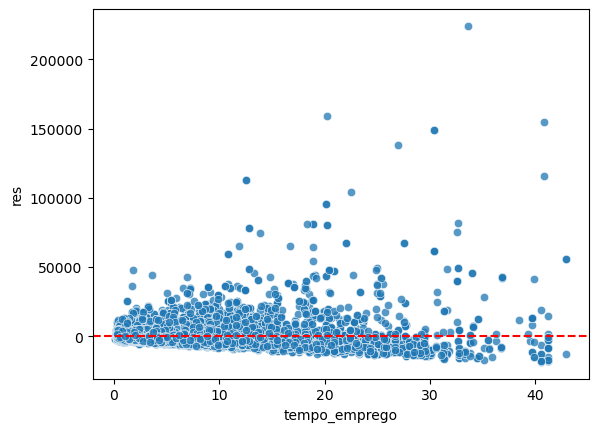

In [32]:
reg = smf.ols('renda ~ posse_de_veiculo+posse_de_imovel+qtd_filhos+tipo_renda+educacao+estado_civil+tipo_residencia+idade+tempo_emprego+qt_pessoas_residencia', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

In [33]:
# 4) Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros.

# R. As variáveis com P>|t| menores que 0.5 são as mais significantes.

y, X = patsy.dmatrices('renda ~ posse_de_veiculo + educacao + posse_de_imovel + tempo_emprego', df1)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     341.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:01:17   Log-Likelihood:            -1.2953e+05
No. Observations:               12427   AIC:                         2.591e+05
Df Residuals:                   12419   BIC:                         2.591e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         784.8078    814.499      0.964      0.335    -811.737    2381.353
posse_de_veiculo[T.True]         2016.7192    148.639     13.568      0.000    1725.364    2308.075
educacao[T.Pós graduação]        -292.8046   1788.518     -0.164      0.870   -3798.578    3212.969
educacao[T.Secundário]            270.7479    808.399      0.335      0.738   -1313.839    1855.335
educacao[T.Superior completo]     513.6985    811.269      0.633      0.527   -1076.515    2103.912
educacao[T.Superior incompleto]  -219.4793    873.429     -0.251      0.802   -1931.536    1492.577
posse_de_imovel[T.True]           182.7570    153.711      1.189      0.234    -118.540     484.054
tempo_emprego                     520.6147     10.933     47.619      0.000     499.185     542.045
==============================================================================
Omnibus:                    17114.808   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7930906.645
Skew:                           7.785   Prob(JB):                         0.00
Kurtosis:                     125.778   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     341.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:04:14   Log-Likelihood:            -1.2953e+05
No. Observations:               12427   AIC:                         2.591e+05
Df Residuals:                   12419   BIC:                         2.591e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

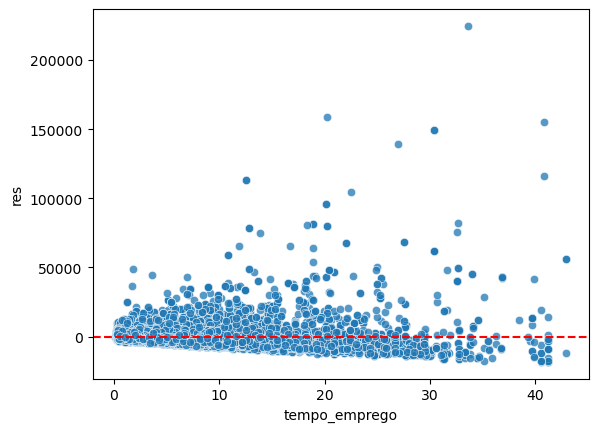

In [36]:
# 5) Faça uma análise de resíduos. Avalie a qualidade do ajuste.


reg = smf.ols('renda ~ posse_de_veiculo + educacao + posse_de_imovel + tempo_emprego', df1).fit()
print(reg.summary())

df1['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df1, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

O modelo ajustado apresentou R² menor do que o modelo original (sem ajuste).